# Minimum of bivariate function

Use the steepest descend method and the Newton method  to approximate  the minimum (${\bf x}^{\star}=(1,1)^{T}$) of the function:
$$f({\bf x})=\frac{1}{2} 0.001(x_1-1)^2+(x_1^2-x_2)^2.$$

Compare the approximations computed by the two methods plotting:

1) the evaluation of the objective function at the vectors generated by the numerical methods;


2) the convergence order $p$ of the numerical scheme can be calculated with
$$log \left(\frac{\|{\bf x}_{k}-{\bf x}^{\star}\|}{\|{\bf x}_{k+1}-{\bf x}^{\star}\|}\right)/ log \left(\frac{\|{\bf x}_{k-1}-{\bf x}^{\star}\|}{\|{\bf x}_k-{\bf x}^{\star}\|}\right)\approx p $$ for all $k >> 1$.

Use the same starting point and as stopping criterion:

$$
\| \nabla f({\bf x}_k)\|_2< 10^{-4}
$$


In [ ]:
import numpy as np
import scipy.optimize
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

In [ ]:
#Objective function
def objective_function(x):
    return ((0.001/2)*(x[0]-1)**2.0 + (x[0]**2.0-x[1])**2.0)

In [ ]:
#Function minimum
x_star = [1., 1.]

In [ ]:
#Function gradient
def function_gradient(xk):
    x1 = xk[0]
    x2 = xk[1]
    dfdx1 = 0.001*(x1-1) + 4*x1*(x1**2.0-x2)
    dfdx2 = -2*(x1**2-x2)
    return np.array([dfdx1,dfdx2])

In [ ]:
#Function Hessian
def function_hessian(xk):
    x1 = xk[0]
    x2 = xk[1]
    df2d2x1 = 0.001 + 4*(3*x1**2.0-x2)
    df2d2x2 = 2
    df2dx1dx2 = -4*x1
    return np.array(([df2d2x1,df2dx1dx2],[df2dx1dx2,df2d2x2]))

In [ ]:
#Steepest descent
def steep_desc(x0,alpha):
    xk = np.copy(x0)
    xks = []
    err=1
    nit=0
    while not(np.linalg.norm(function_gradient(xk)) < 1e-4):
        nit=nit+1
        grad = function_gradient(xk)
        xk = xk - alpha*grad
        err =  np.linalg.norm(np.abs(grad))
        xks.append(xk)
    ps = [] #Convergence
    for k in range(1,nit-1):
        p = np.log(np.linalg.norm(xks[k] - x_star) / np.linalg.norm(xks[k+1] - x_star)) / np.log(np.linalg.norm(xks[k-1] - x_star) / np.linalg.norm(xks[k] - x_star))
        ps.append(p)
    print('STEEPEST DESCENT','\nNumber of iterations:',nit,'\nError:',err,'\nApproximation:',xk,'\nFunction value at approximation:',objective_function(xk))
    return xk, ps

In [ ]:
#Newton method
def newton(x0,alpha):
    xk = np.copy(x0)
    xks = []
    err=1
    nit=0
    while not(np.linalg.norm(function_gradient(xk)) < 1e-4):
        nit=nit+1
        grad = function_gradient(xk)
        hess = function_hessian(xk)
        xk = xk - np.dot(np.linalg.inv(hess),grad)
        err =  np.linalg.norm(np.abs(grad))
        xks.append(xk)
    ps = [] #Convergence
    for k in range(1,nit-1):
        p = (np.log(np.linalg.norm(xks[k] - x_star) / np.linalg.norm(xks[k+1] - x_star))) / (np.log(np.linalg.norm(xks[k-1] - x_star) / np.linalg.norm(xks[k] - x_star)))
        ps.append(p)
    print('NEWTON METHOD','\nNumber of iterations:',nit,'\nError:',err,'\nApproximation:',xk,'\nFunction value at approximation:',objective_function(xk))
    return xk, ps

In [ ]:
#Compute the minimum approximations
x0 = np.array([2.,2.]) #Starting point
steep_desc_min, ps_steep = steep_desc(x0, 0.1) #Minimum approximation with steepest descent method
print('\n')
newton_min, ps_newton = newton(x0, 0.1) #Minimum approximation with Newton method

print('\n')
print('Function value at x*:', objective_function(x_star))

In [ ]:
%matplotlib notebook

<IPython.core.display.Javascript object>


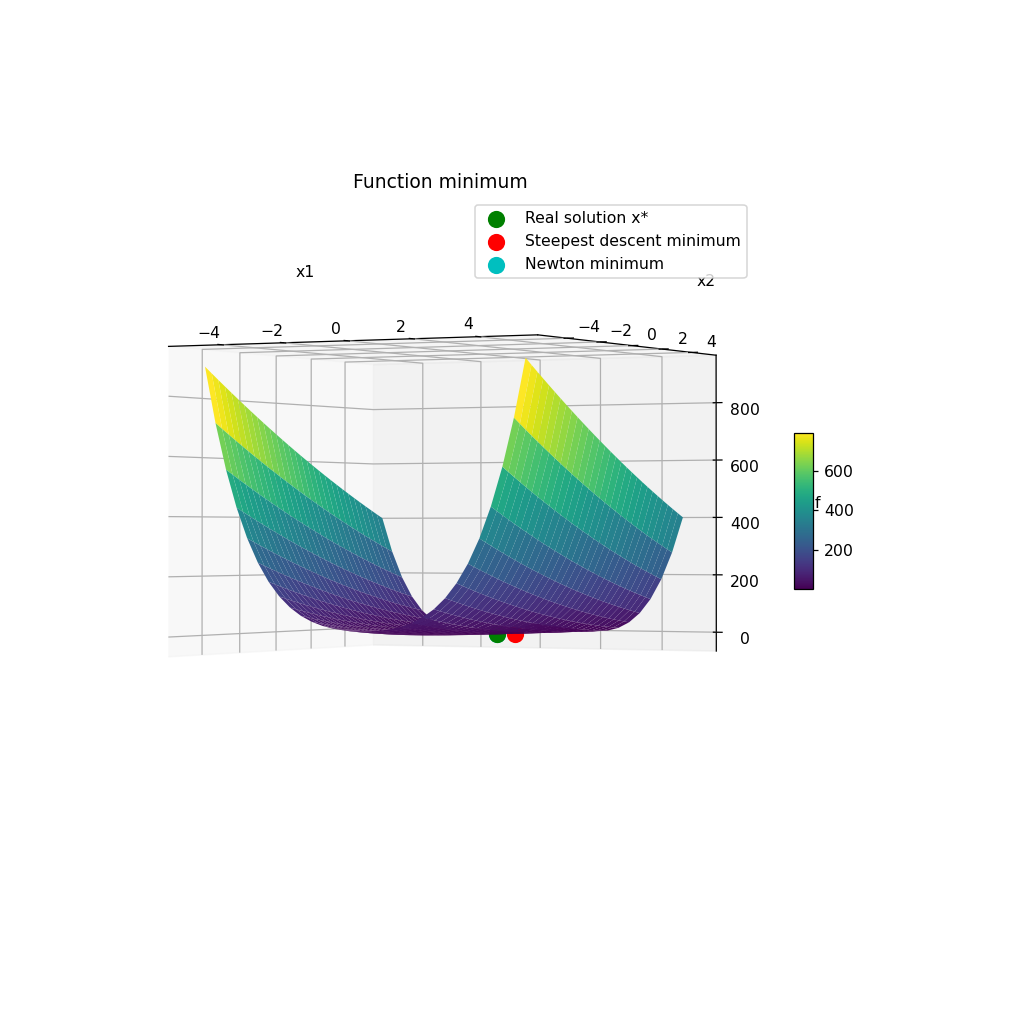

In [ ]:
#Plot the function value at the computed approximations
fig = plt.figure(figsize = (9,9))
ax = plt.axes(projection='3d')

x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)

X, Y = np.meshgrid(x, y)
Z = objective_function([X,Y])

surf = ax.plot_surface(X, Y, Z, cmap='viridis')

#Real solution
ax.scatter3D(x_star[0], x_star[1], objective_function(x_star), s=[100], c='g', label='Real solution x*')
#Gradient descent approximation
ax.scatter3D(steep_desc_min[0], steep_desc_min[1], objective_function(steep_desc_min), s=[100], c='r', label='Steepest descent minimum')
#Newton approximation
ax.scatter3D(newton_min[0], newton_min[1], objective_function(steep_desc_min), s=[100], c='c', label='Newton minimum')

# Set axes labels
ax.set_xlabel('x1', labelpad=20)
ax.set_ylabel('x2', labelpad=20)
ax.set_zlabel('f', labelpad=20)

ax.elev = 0
ax.azim = 270  # xz view

ax.elev = 0
ax.azim = 0    # yz view

ax.elev = 0
ax.azim = 270  # xy view

fig.colorbar(surf, shrink=0.2, aspect=8)
plt.legend(loc="upper right")
plt.title('Function minimum')
plt.show()

#The graph is interactive:
#to rotate, press the left mouse button and drag in either direction
#to zoom, press the right mouse button and drag down (drag up to pan)

<IPython.core.display.Javascript object>


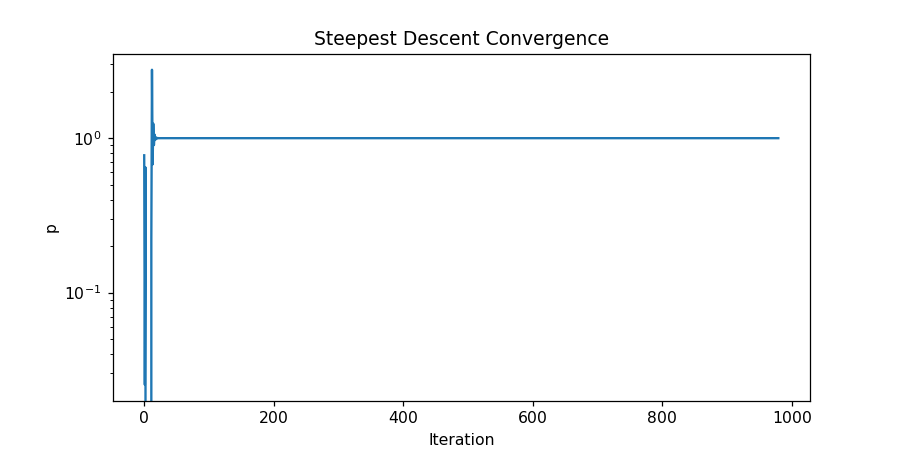

In [ ]:
#Steepest descent convergence
fig, ax = plt.subplots(figsize=(8,4))
ax.semilogy(ps_steep)
ax.set_title('Steepest Descent Convergence')
ax.set_xlabel('Iteration')
ax.set_ylabel('p')
plt.show()

<IPython.core.display.Javascript object>


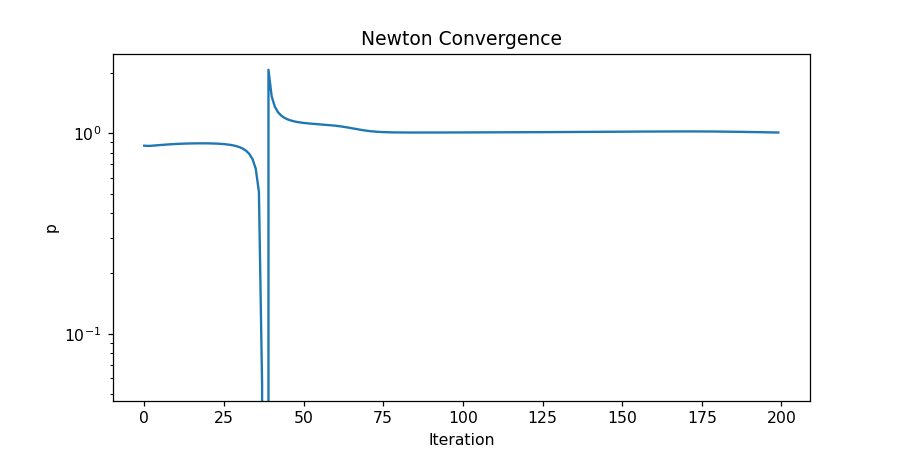

In [ ]:
#Newton convergence
fig, ax = plt.subplots(figsize=(8,4))
ax.semilogy(ps_newton)
ax.set_title('Newton Convergence')
ax.set_xlabel('Iteration')
ax.set_ylabel('p')
plt.show()